In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
from collections import Counter
import os
from gensim.models.coherencemodel import CoherenceModel

In [2]:
allrecipe_df = pd.read_excel("./data/allrecipes_data.xlsx")
foodnetwork_df = pd.read_excel("./data/foodnetwork_data.xlsx")
kaggle_df = pd.read_csv("./data/kaggle_data.csv", index_col=0)

In [3]:
allrecipe_df.shape, foodnetwork_df.shape, kaggle_df.shape

((10692, 4), (25465, 4), (13501, 5))

In [4]:
allrecipe_df.head()

,food,ingredients,steps,images
0,Air Fryer Honey-Mustard Chicken Thighs,4 boneless skinless chicken thighs\n1/2 teaspo...,Step 1: Preheat the air fryer to 390 degrees F...,https://www.allrecipes.com/thmb/-CYgGC7jTLUw5_...
1,Air Fryer Hearts of Palm Sticks,1/4 cup all-purpose flour\n1/4 teaspoon salt\n...,"Step 1: Stir flour, salt, and pepper together ...",https://www.allrecipes.com/thmb/Kef01dPFOlBSmG...
2,Air Fryer Spanakopita,"2 (10- ounces) pkg. spinach, thawed and squeez...","Step 1: For filling, stir together spinach, fe...",https://www.allrecipes.com/thmb/FuRqOs7lAsE79g...
3,Air Fryer Pecan Crusted Trout,2/3 cup chopped pecans\n1 teaspoon dried rosem...,Step 1: Preheat air fryer to 400 degrees F (20...,https://www.allrecipes.com/thmb/yGwefCpl2pUVNp...
4,Air Fryer Tempura Vegetables,2 large egg whites\n1/4 cup seltzer water\n1/2...,Step 1: Preheat air fryer to 350 degrees F (17...,https://www.allrecipes.com/thmb/pfHuAFFkbGAIRr...


In [5]:
foodnetwork_df.head()

,food,ingredients,steps,images
0,"""16 Bean"" Pasta E Fagioli",1 (1-pound) bag Goya 16 Bean Soup Mix\n2 table...,Step 1: The day before you plan to make the so...,https://food.fnr.sndimg.com/content/dam/images...
1,"""16 Bean"" Pasta e Fagioli",1 (1-pound) bag 16 Bean Soup Mix\n2 tablespoon...,Step 1: The day before you plan to make the so...,https://food.fnr.sndimg.com/content/dam/images...
2,1 S'more for the Road and Kiddie S'mores,Nonstick canola oil spray\n1 pound marshmallow...,Step 1: Coat a large microwave-safe bowl with ...,https://food.fnr.sndimg.com/content/dam/images...
3,1-2-3 Lasagna,1 (15-ounce) container ricotta\n1 cup grated P...,Step 1: Preheat the oven to 375 degrees F.\nSt...,https://food.fnr.sndimg.com/content/dam/images...
4,1-Hour Beef Pho,12 ounces flank steak\n4 cinnamon sticks\n3 st...,Step 1: Cut the flank steak in half lengthwise...,https://food.fnr.sndimg.com/content/dam/images...


In [6]:
kaggle_df.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [7]:
kaggle_df.isna().sum()

Title                  5
Ingredients            0
Instructions           8
Image_Name             0
Cleaned_Ingredients    0
dtype: int64

In [8]:
kaggle_df = kaggle_df[~kaggle_df['Instructions'].isna()]

In [9]:
kaggle_df.isna().sum()

Title                  0
Ingredients            0
Instructions           0
Image_Name             0
Cleaned_Ingredients    0
dtype: int64

In [10]:
df = pd.concat([allrecipe_df['food'], foodnetwork_df['food'], kaggle_df['Title']], axis=0).reset_index(drop=True)

In [11]:
recipe_names = df.values

In [12]:
recipe_names.shape

(49650,)

In [13]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  
recipe_names_transformed = tfidf_vectorizer.fit_transform(recipe_names)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [14]:
recipe_names_transformed.shape

(49650, 9876)

In [15]:
mean_tfidf_scores = np.mean(recipe_names_transformed, axis=0)
word_tfidf_scores = [(word, mean_tfidf_scores[0, idx]) for idx, word in enumerate(feature_names)]
sorted_word_tfidf_scores = sorted(word_tfidf_scores, key=lambda x: x[1], reverse=True)
top_four_words = [(word, score) for word, score in sorted_word_tfidf_scores[:4]]

In [16]:
top_four_words

[('chicken', 0.02363143274675936),
 ('salad', 0.01969734856245372),
 ('chocolate', 0.016074584742783744),
 ('grilled', 0.015183652207336274)]

In [17]:
n_topics = 250

nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_matrix = nmf_model.fit_transform(recipe_names_transformed)

In [18]:
nmf_matrix.shape

(49650, 250)

In [19]:
threshold = 0
max_topic_prob = np.max(nmf_matrix, axis=1) 
filtered_recipes = np.where(max_topic_prob > threshold)[0]
filtered_nmf_matrix = nmf_matrix[filtered_recipes]

In [20]:
filtered_nmf_matrix.shape

(49650, 250)

In [21]:
labels = np.argmax(filtered_nmf_matrix, axis=1)
labels.shape

(49650,)

In [22]:
labels

array([ 33,  33,  33, ...,  11, 158, 143], dtype=int64)

In [23]:
# Count the occurrences of each label
label_counts = Counter(labels)

# Print label distribution
print("Label Distribution:")
for label, count in label_counts.items():
    print(f"Category: {label}, Count: {count}")

Label Distribution:
Category: 33, Count: 297
Category: 239, Count: 263
Category: 176, Count: 168
Category: 113, Count: 188
Category: 248, Count: 235
Category: 66, Count: 206
Category: 8, Count: 935
Category: 52, Count: 125
Category: 168, Count: 301
Category: 19, Count: 574
Category: 0, Count: 837
Category: 10, Count: 439
Category: 86, Count: 94
Category: 6, Count: 1261
Category: 212, Count: 136
Category: 65, Count: 378
Category: 82, Count: 152
Category: 155, Count: 290
Category: 54, Count: 68
Category: 192, Count: 553
Category: 246, Count: 377
Category: 165, Count: 189
Category: 128, Count: 171
Category: 157, Count: 197
Category: 23, Count: 418
Category: 68, Count: 140
Category: 249, Count: 699
Category: 29, Count: 180
Category: 238, Count: 241
Category: 245, Count: 294
Category: 149, Count: 56
Category: 28, Count: 386
Category: 120, Count: 142
Category: 159, Count: 34
Category: 213, Count: 109
Category: 230, Count: 370
Category: 204, Count: 188
Category: 126, Count: 175
Category: 18, 

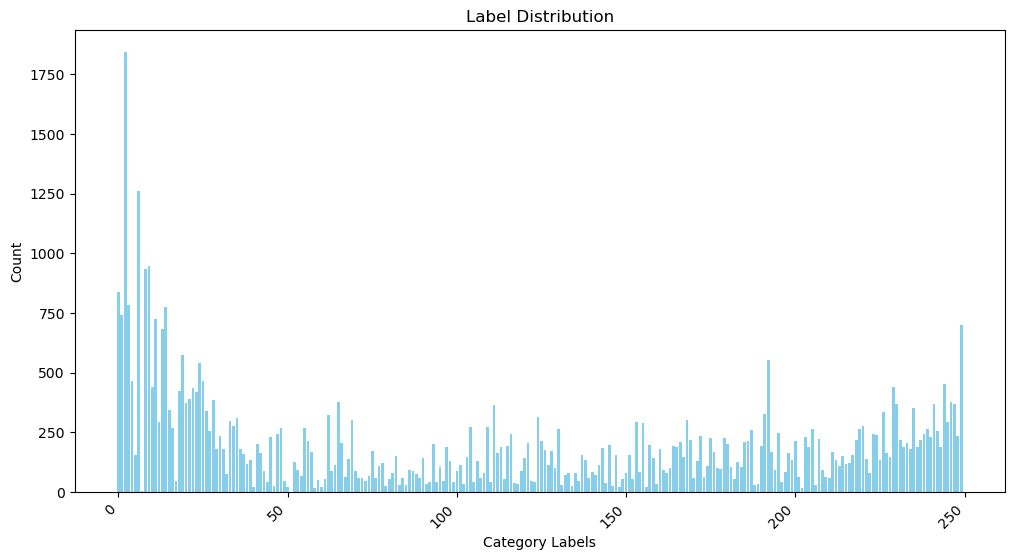

In [24]:
import matplotlib.pyplot as plt

# Convert label_counts to lists for plotting
lab, counts = zip(*label_counts.items())

# Plotting label distribution
plt.figure(figsize=(12, 6))
plt.bar(lab, counts, color='skyblue')
plt.xlabel('Category Labels')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
def get_top_words(model, feature_names, n_top_words=4):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

top_words_per_topic = get_top_words(nmf_model, feature_names, n_top_words=6)

In [26]:
top_words_per_topic[2]

['salad', 'caesar', 'chopped', 'cobb', 'celery', 'waldorf']

In [27]:
tsne = TSNE(n_components=2, random_state=42)
tsne_matrix = tsne.fit_transform(filtered_nmf_matrix)

In [28]:
tsne_matrix.shape

(49650, 2)

In [29]:
palette = sns.color_palette(cc.glasbey, n_colors=n_topics)

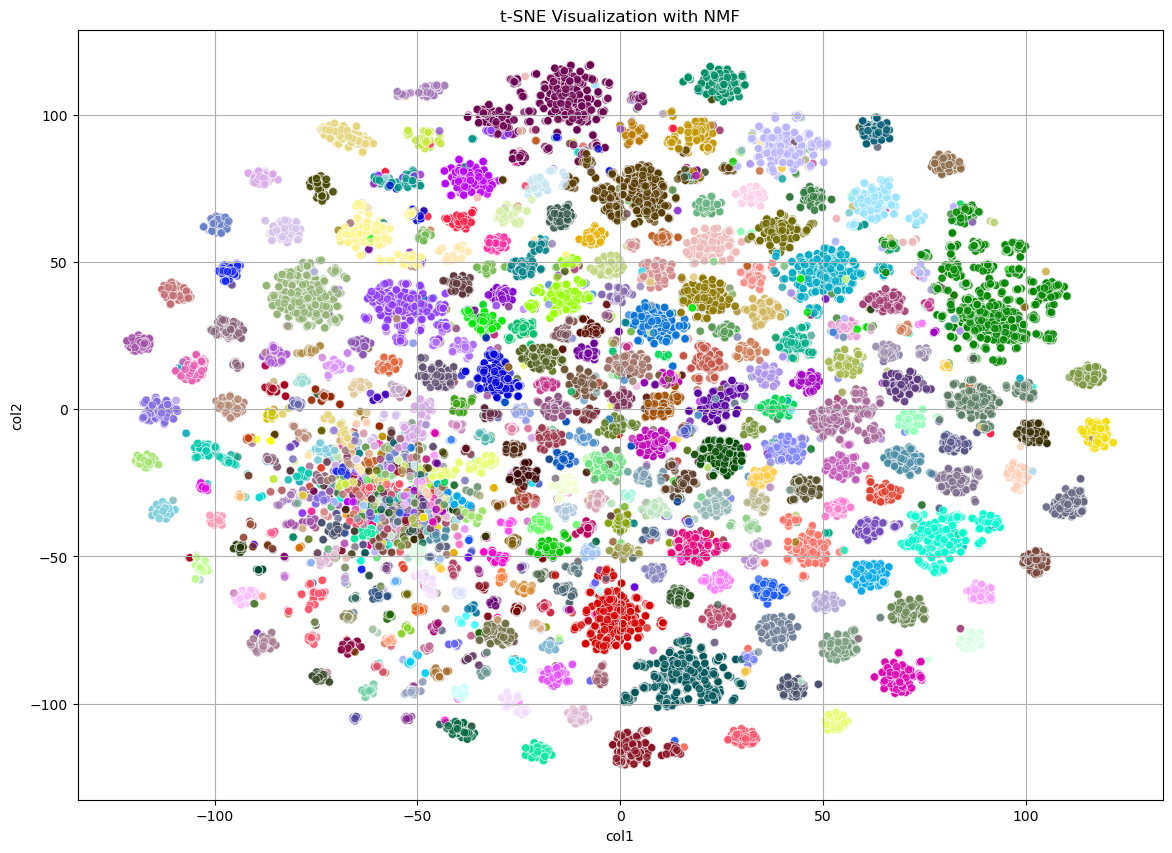

In [30]:
df = pd.DataFrame(tsne_matrix, columns=['col1', 'col2'])
df['labels'] = labels

# Set up Seaborn style and create scatter plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x='col1', y='col2', hue='labels', data=df, palette=palette, alpha=0.7, legend=False)
plt.title('t-SNE Visualization with NMF')
# plt.legend(ncol=4)
plt.grid()
plt.show()

In [41]:
allrecipt_imageDirs = []
kaggle_imageDirs = []
foodnetwork_imageDirs = []

for i in range(allrecipe_df.shape[0]):
    allrecipt_imageDirs.append('./data/images/allrecipes_images/image_' + str(i) + '.jpg')

for index, row in foodnetwork_df.iterrows():
    image_name = row['images'].split('/')[-1] or f'image_{index}.jpg'
    foodnetwork_imageDirs.append('./data/images/foodnetwork_images/' + image_name)
    
for imgName in kaggle_df['Image_Name']:
    kaggle_imageDirs.append('./data/images/kaggle_images/' + imgName + '.jpg')

all_imageDirs = allrecipt_imageDirs + foodnetwork_imageDirs + kaggle_imageDirs

dataset = []
badList = ['./foodnetwork_images/foodnetwork_images/1677268264252.jpeg',
           './foodnetwork_images/foodnetwork_images/1382967555384.jpeg']
for i in range(len(all_imageDirs)):
    try:
    #     if os.path.exists(all_imageDirs[i]) and all_imageDirs[i] not in badList:
        if os.path.exists(all_imageDirs[i]) and Image.open(all_imageDirs[i]):
            dataset.append((all_imageDirs[i], labels[i]))
    except:
        print(f"invalid image path {all_imageDirs[i]}")
        
np.save('./data/interim/NMF_dataset', dataset)

invalid image path ./data/images/foodnetwork_images/1677268264252.jpeg
invalid image path ./data/images/foodnetwork_images/1382967555384.jpeg


In [43]:
len(dataset)

49540

## Pre-load dataset

In [44]:
from sklearn.model_selection import train_test_split
from PIL import Image
import torch
import pickle

In [45]:
dataset = np.load('./data/interim/NMF_dataset.npy')
train_dataset, test_dataset = train_test_split(dataset, train_size=0.85 , random_state=42)
train_dataset, val_dataset = train_test_split(train_dataset, train_size=0.8 , random_state=42)

In [46]:
def load_dataset(dataset):
    dataset = dataset.tolist()
    for i in range(len(dataset)):
        if (i+1) % 100 == 0:
            print('loading image {} of {}'.format(i+1, len(dataset)))
        image = Image.open(dataset[i][0])
        image = image.resize((224, 224))  # Resize image to 112x112 (adjust as needed)
        image = image.convert('RGB')
        image = np.array(image)
        image = np.transpose(image, (2, 0, 1))
        image = image / 255.0
        image_tensor = torch.tensor(image, dtype=torch.float32)
        dataset[i].append(image_tensor)

    return dataset        

In [47]:
train_dataset = load_dataset(train_dataset)
val_dataset = load_dataset(val_dataset)
test_dataset = load_dataset(test_dataset)

with open(f'./data/processed/NMF_train.pkl', 'wb') as f:
        pickle.dump(train_dataset, f)
with open(f'./data/processed/NMF_val.pkl', 'wb') as f:
        pickle.dump(val_dataset, f)
with open(f'./data/processed/NMF_test.pkl', 'wb') as f:
        pickle.dump(test_dataset, f)

loading image 100 of 33687
loading image 200 of 33687
loading image 300 of 33687
loading image 400 of 33687
loading image 500 of 33687
loading image 600 of 33687
loading image 700 of 33687
loading image 800 of 33687
loading image 900 of 33687
loading image 1000 of 33687
loading image 1100 of 33687
loading image 1200 of 33687
loading image 1300 of 33687
loading image 1400 of 33687
loading image 1500 of 33687
loading image 1600 of 33687
loading image 1700 of 33687
loading image 1800 of 33687
loading image 1900 of 33687
loading image 2000 of 33687
loading image 2100 of 33687
loading image 2200 of 33687
loading image 2300 of 33687
loading image 2400 of 33687
loading image 2500 of 33687
loading image 2600 of 33687
loading image 2700 of 33687
loading image 2800 of 33687
loading image 2900 of 33687
loading image 3000 of 33687
loading image 3100 of 33687
loading image 3200 of 33687
loading image 3300 of 33687
loading image 3400 of 33687
loading image 3500 of 33687
loading image 3600 of 33687
l

loading image 28800 of 33687
loading image 28900 of 33687
loading image 29000 of 33687
loading image 29100 of 33687
loading image 29200 of 33687
loading image 29300 of 33687
loading image 29400 of 33687
loading image 29500 of 33687
loading image 29600 of 33687
loading image 29700 of 33687
loading image 29800 of 33687
loading image 29900 of 33687
loading image 30000 of 33687
loading image 30100 of 33687
loading image 30200 of 33687
loading image 30300 of 33687
loading image 30400 of 33687
loading image 30500 of 33687
loading image 30600 of 33687
loading image 30700 of 33687
loading image 30800 of 33687
loading image 30900 of 33687
loading image 31000 of 33687
loading image 31100 of 33687
loading image 31200 of 33687
loading image 31300 of 33687
loading image 31400 of 33687
loading image 31500 of 33687
loading image 31600 of 33687
loading image 31700 of 33687
loading image 31800 of 33687
loading image 31900 of 33687
loading image 32000 of 33687
loading image 32100 of 33687
loading image 